# Pendle YT Timing Strategy Analyzer**V5**


[Author's Twitter](https://twitter.com/quant_sheep?t=KqHtg0lNFy-sejP_dFOUXg&s=09)


**buy me a coffee: 0x334D7763eD1e23bD4052e9551DB3Dac506a64F1E**

No coding skills? No problem! I've open-sourced & simplified the analysis: **just fill a form & click in Colab**. Discover the best strategy for earning points with Pendle's YT on your own!

# Risk Warning
1. abcETH's de-pegging risk and underlying asset price risk: The red line represents the amount of points obtained by investing 1 abcETH (not the underlying asset) to purchase YT at a certain point in time and holding it until maturity. The points obtained depend on the pool corresponding to abcETH (such as ezETH), but abcETH may de-peg from ETH. The underlying asset (such as ETH) also has price risk.

2. Strategy risk: The fair implied APY of the strategy is determined based on historical data, so the fair price line cannot be considered an accurate prediction of future prices. The YT Fair price line is a rough estimate of the average YT price based on historical data.

3. Analysis tool risk: The data obtained by analysis tools may not be timely enough. The tools are only for learning and reference, and their stability in a production environment is not guaranteed.

# Pendle的YT择时策略分析器 **第五版本**

[作者的推特账号](https://twitter.com/quant_sheep?t=KqHtg0lNFy-sejP_dFOUXg&s=09)

**如果你觉得这个工具值得一杯咖啡的话，欢迎转账支持：0x334D7763eD1e23bD4052e9551DB3Dac506a64F1E**


没有编程技能？没问题！我已经开源并简化了分析：**只需填写表格并在 Colab 上点击**。现在，您可以自己发现用 Pendle 的 YT 赚取积分的最佳策略！


# 风险提示

1. abcETH与ETH的脱锚风险和underlying asset币价风险：实际上 红色的线代表：在某个时间点，投入 1 个abcETH （而不是underlying）购买yt，持有到期获得的积分数量。所谓的积分数量是依据池子对应的abcETH（比如ezETH）所决定的，但是abcETH会与ETH发生脱锚（depeg）。underlying asset（如ETH）本身也有币价风险。

2. 策略风险：策略的fair implied apy是依据历史数据去确定的，因此fair price line不能看做对未来价格的精准预测。YT Fair price line是一种基于历史数据对YT 价格平均水平的粗略估计。

3. 分析工具风险：分析工具获取的数据可能不够及时。工具本身只是供学习参考，在生产环境中的稳定性没有保障。




# 中文教程

[策略的更多信息](https://docs.google.com/document/d/17CrXT0NUsDGG4QVpROrauR-nTfNzYCVSebtQdiDEgoI/edit)

欢迎加入Pendle中文社区获取更多策略讯息：[telegram链接](https://t.me/PendleFinance_CN)

第0步骤：选择池子所在的的网络（目前支持ethereum，arbitrum，mantle）

第一步：打开池子主页填入Market和yt的合约地址:

请找到代币主页，点击红色方框

参见第一张图片

接下来是填入对应地址

参见第二张图片



第三步: 确定每小时可获得的点数


1. **查阅项目文档**：在与流动性池相关的项目文档中查找有关每小时获得的点数的信息。通常，文档会显示每天或每小时的点数。

2. **计算每小时点数**：如果文档只提供了每天的点数，您可以将其转换为每小时点数。例如，如果一天有24小时，将每天的点数除以24，即可得到每小时的点数。



第四步：查看Pendle给予的额外倍数

# English Tutorial
[more infromation about the strategy ](https://docs.google.com/document/d/1MUHDZqcMZwv5h4CJwk_2LLev8zy6GjbSdevnAwpG0LE/edit)

Step 0: Choose the network where the pool is located (currently supports Ethereum, Arbitrum, Mantle).

Step 1: Open the pool's homepage and enter the Market and yt contract addresses.

Please go to the token's homepage and click on the red box.

See the first image.

Next, enter the corresponding address.

See the second image.



Step 3: Determine Points Earned Per Hour

1. **Refer to Project Documentation**: Look for information on the points earned per hour in the project documentation related to the liquidity pool. These documents often provide details on the points earned per day or per hour.

2. **Calculate Points Per Hour**: If the documentation only provides points per day, you can convert it to points per hour. For example, if a day has 24 hours, divide the daily points by 24 to get the points per hour.



Step 4: Check the additional multiplier provided by Pendle.

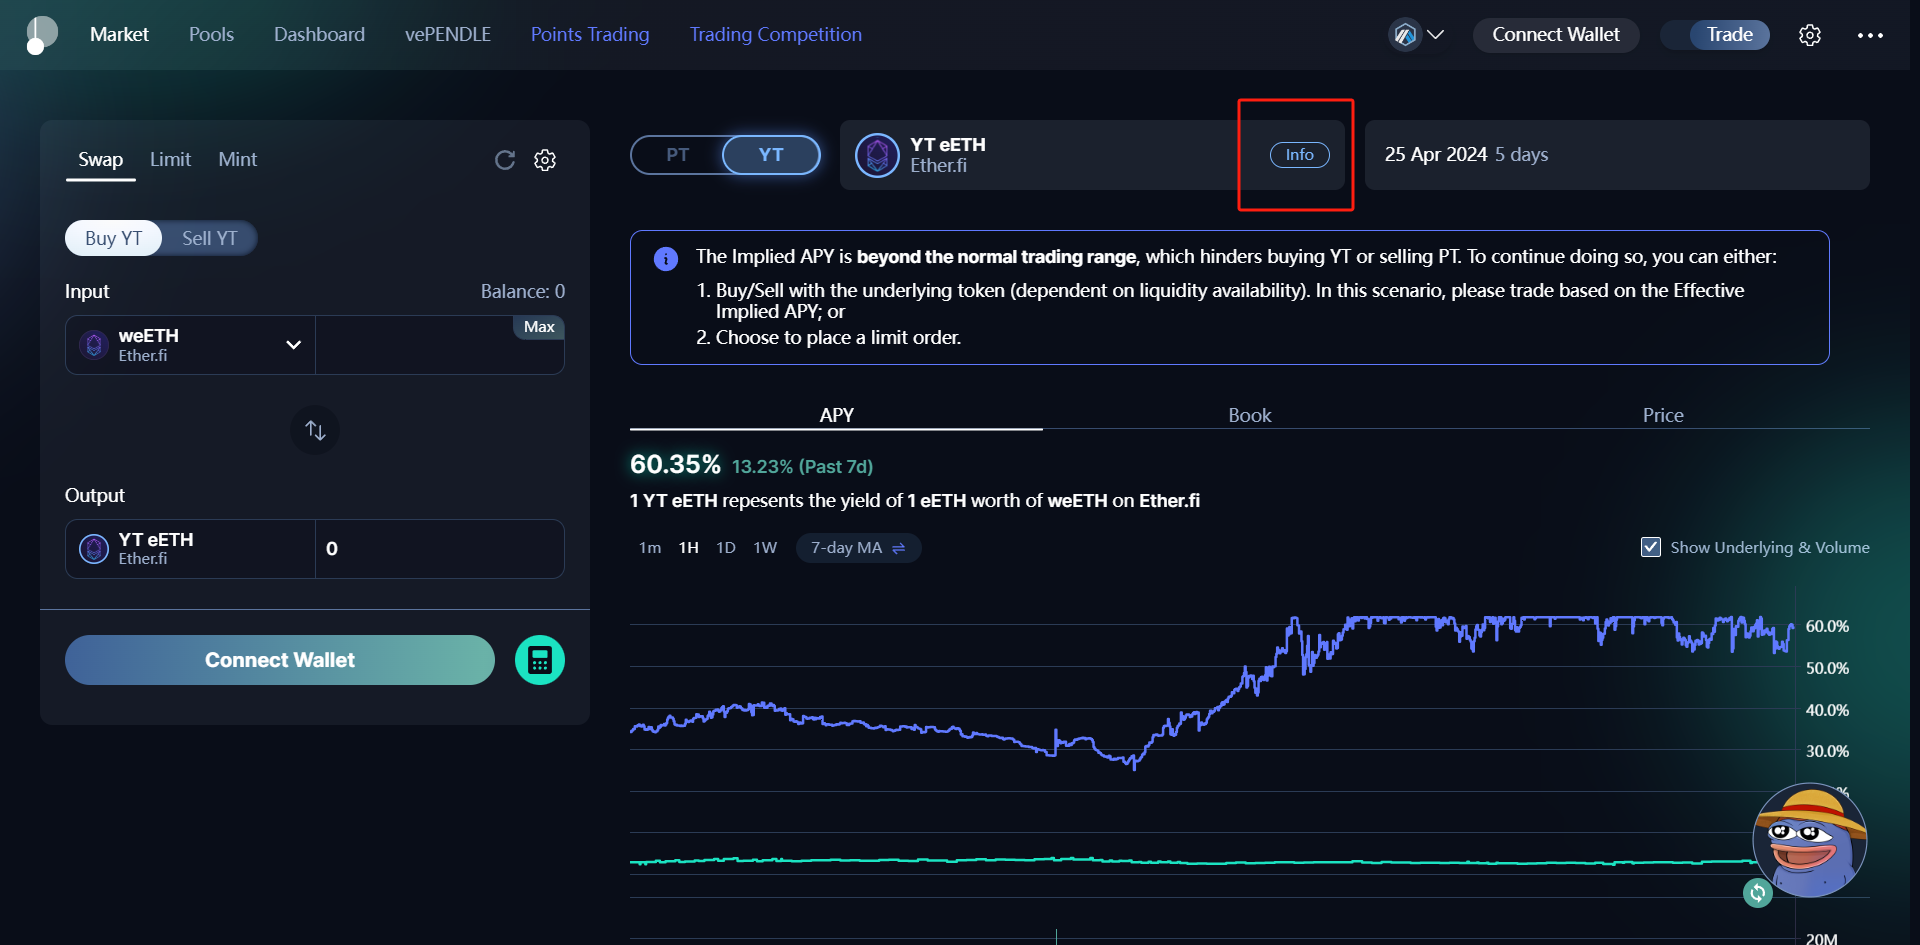

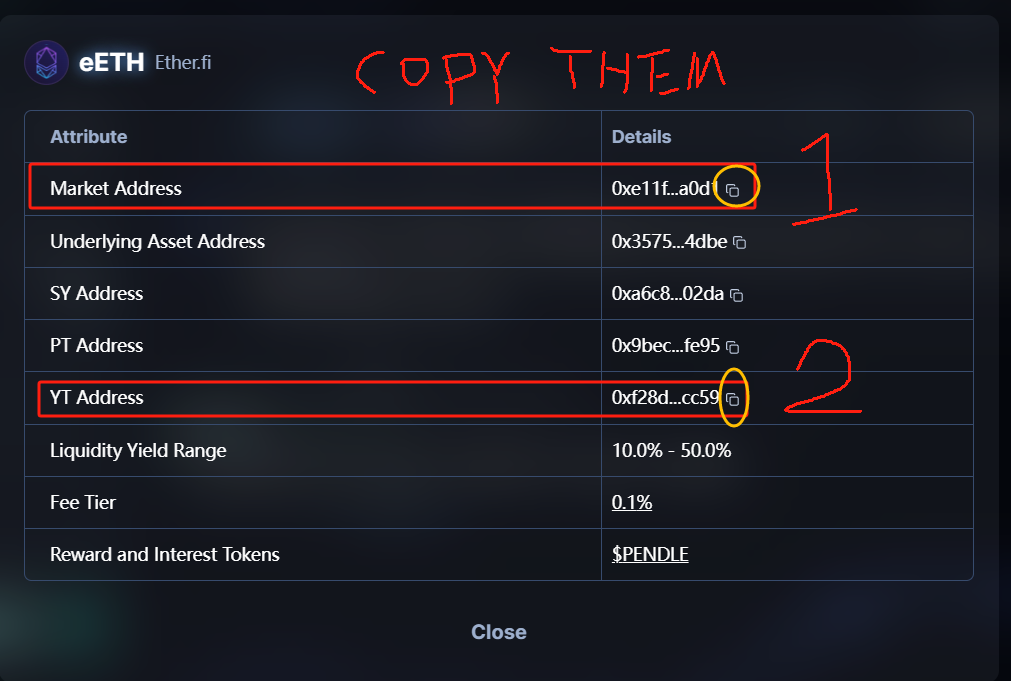

# **🍻🍻第一部分是填写必须的和选填的表格🍻🍻**
# **🍻🍻PART1: The first part is to fill out the required and optional forms🍻🍻**

# **1. 必须填写的表单/Required Form🛹🛹**

In [1]:
# @title 必填表单/Required Form
import io
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timezone, timedelta
from dateutil import parser
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Network configuration
network = 'ethereum'  # @param {type:"string"}
network_ids = {
    'arbitrum': '/42161',
    'ethereum': '/1',
    'mantle': '/5000'
}

# Initialize session with retry mechanism
session = requests.session()
retry = Retry(total=3, backoff_factor=1)
session.mount('http://', HTTPAdapter(max_retries=retry))
session.mount('https://', HTTPAdapter(max_retries=retry))

# Retrieve network ID
network_id = network_ids.get(network.lower())
if network_id is None:
    raise ValueError("Unsupported network type")

# Construct the request URL and headers
url = f'https://api-v2.pendle.finance/core/v1{network_id}/assets/all'
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36"
}

# Send request and parse response
response = session.get(url, headers=headers)
data = response.json()

# Function to find valid assets based on given parameters
def find_valid_assets(data, base_type, expiry_key, address):
    """
    Find valid assets matching the specified criteria.
    
    :param data: The asset data returned by the API
    :param base_type: The type of asset to filter by (e.g., 'YT')
    :param expiry_key: The key indicating the expiry date of the asset
    :param address: The contract address to filter by
    :return: A list of valid assets that meet the criteria
    """
    current_time = datetime.utcnow().replace(tzinfo=timezone.utc)

    def parse_to_utc(date_str):
        dt = parser.parse(date_str)
        return dt.astimezone(timezone.utc)

    def format_expiry(date_str):
        dt = parse_to_utc(date_str)
        return dt.strftime('%Y-%m-%d %H:%M:%S')

    valid_assets = [
        {**item, expiry_key: format_expiry(item[expiry_key])} for item in data
        if item.get('baseType') == base_type and
           item.get('address') == address and
           expiry_key in item
    ]

    return valid_assets

# Form parameter configuration
market_contract = "0x00b321d89a8c36b3929f20b7955080baed706d1b"  # @param {type:"string"}
yt_contract = '0x4f0b4e6512630480b868e62a8a1d3451b0e9192d'  # @param {type:"string"}
start_time = "2023-01-01 00:00:00"
underlying_amount = 1  # @param {type:"number"}
points_per_hour_per_underlying = 0.04  # @param {type:"number"}
pendle_yt_multiplier = 5  # @param {type:"number"}
dark_mode = False  # @param {type:"boolean"}

# Handle time and chart mode
datetime_obj = datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S')
start_time = datetime_obj.replace(tzinfo=timezone.utc).isoformat(timespec='milliseconds').replace('+00:00', 'Z')
points = points_per_hour_per_underlying

mode = 'plotly_dark' if dark_mode else 'plotly_white'

# Find valid YT assets
valid_assets = find_valid_assets(data, 'YT', 'expiry', yt_contract)
if not valid_assets:
    raise ValueError("No valid assets found with the given parameters")

symbol = valid_assets[0]['symbol']
maturity = valid_assets[0]['expiry']


# **2. 填写选填表单 #1 可以自动分析你的投资情况，同时在图片中会个性化展示**
# **2. Filling out the optional form #1 allows automatic analysis of your investment situation, with personalized visualization in the image.**


In [2]:
# @title 选填表单 #1 | Optional Form #1
turn_on_auto_analysis_1 = True # @param {type:"boolean"}
yt_purchase_time = "2024-08-08 23:00:00" # @param {type:"string"}
underlying_invest_amount = 1 # @param {type:"number"}


# **3. 选填的表单 #2 可以为你模拟设置limit order如果成交后的的预期收益**
# **3. Optional Form #2 can simulate setting a limit order and the expected profit after it is filled**

In [3]:
# @title 选填表单 #2 / Optional Form #2
turn_on_auto_analysis_2 = True # @param {type:"boolean"}
limmit_order_yt_estimated_purchase_time = "2024-08-08 06:00:00" # @param {type:"string"}
limmit_order_implied_apy_0_to_1 = 0.05 # @param {type:"number"}
limmit_order_underlying_invest_amount = 1 # @param {type:"number"}

#  **🥰🥰第二部分运行全部代码 CTRL+F9🥰🥰**
#  **🥰🥰PART 2 : RUN THE NOTEBOOK ! CTRL+F9🥰🥰**
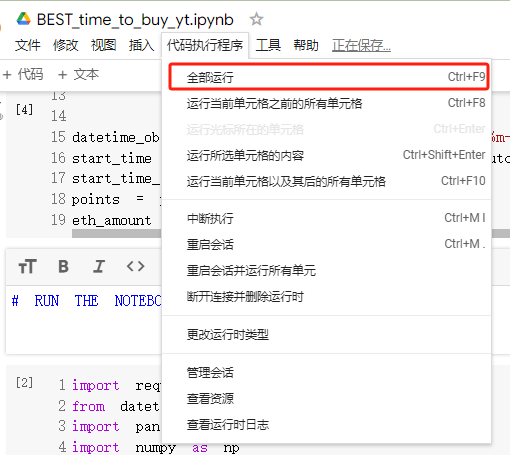

In [4]:
# @title 数据自动获取部分/Data automatic acquisition part
import requests
import pandas as pd
from datetime import datetime, timezone
import io

class DataAcquisition:
    def __init__(self, market_contract, yt_contract, start_time_str, network):
        self.session = self._init_session()
        self.market_contract = market_contract
        self.yt_contract = yt_contract
        self.start_time_str = start_time_str
        self.end_time_str = datetime.utcnow().strftime('%Y-%m-%dT%H:%M:%S.000Z')
        self.interval = '1h'
        self.network_id = self._get_network_id(network)
        self.url_apy = f'https://api-v2.pendle.finance/core/v1{self.network_id}/markets/{self.market_contract}/apy-history-1ma'
        self.url_ohlcv_yteth = f'https://api-v2.pendle.finance/core/v3{self.network_id}/prices/{self.yt_contract}/ohlcv'
        self.headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36"
        }

    @staticmethod
    def _init_session():
        """Initialize the session with retry capability."""
        session = requests.Session()
        retry = requests.packages.urllib3.util.retry.Retry(total=3, backoff_factor=1)
        session.mount('http://', requests.adapters.HTTPAdapter(max_retries=retry))
        session.mount('https://', requests.adapters.HTTPAdapter(max_retries=retry))
        return session

    @staticmethod
    def _get_network_id(network):
        """Retrieve the network ID based on the network name."""
        network_ids = {
            'arbitrum': '/42161',
            'ethereum': '/1',
            'mantle': '/5000'
        }
        network_id = network_ids.get(network.lower())
        if network_id is None:
            raise ValueError("Unsupported network type")
        return network_id

    def fetch_yteth_ohlcv(self):
        """Fetch OHLCV data for the YT contract."""
        params = {
            "time_frame": "hour",
            "timestamp_start": self.start_time_str,
            "timestamp_end": self.end_time_str
        }
        response = self.session.get(self.url_ohlcv_yteth, headers=self.headers, params=params)
        results = response.json().get('results', [])
        data = [
            [datetime.fromisoformat(item['time'].rstrip('Z')), item['open'], item['high'], item['low'], item['close'], item.get('volume', 0)]
            for item in results
        ]
        return pd.DataFrame(data, columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])

    def fetch_apy(self):
        """Fetch APY data for the market contract."""
        params = {
            "time_frame": "hour",
            "timestamp_start": self.start_time_str,
            "timestamp_end": self.end_time_str
        }
        response = self.session.get(self.url_apy, headers=self.headers, params=params)
        if response.status_code == 200:
            data = response.json()
            if 'results' in data:
                csv_data = data['results']
                df = pd.read_csv(io.StringIO(csv_data))
                df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
                return df
            else:
                print("No results found in the API response")
                return pd.DataFrame()
        else:
            print(f"Failed to retrieve data with status code: {response.status_code}")
            return pd.DataFrame()

    def run(self):
        """Execute the data retrieval process and combine the results."""
        df = self.fetch_apy()
        volume = self.fetch_yteth_ohlcv()['Volume']
        if not df.empty:
            df['volume'] = volume
            df.drop(index=df.index[-1], axis=0, inplace=True)  # Drop the last row if necessary
            return df
        else:
            print("No data to display.")
            return pd.DataFrame()

# Initialize the data acquisition instance and run the data retrieval process
data_acquisition = DataAcquisition(market_contract, yt_contract, start_time, network=network)
df = data_acquisition.run()
df

,timestamp,underlyingApy,impliedApy,volume
0,2024-08-06 09:00:00,0.0,0.2472,0.000000
1,2024-08-06 10:00:00,0.0,0.2472,0.000000
2,2024-08-06 11:00:00,0.0,0.2472,0.000000
3,2024-08-06 12:00:00,0.0,0.2472,0.000000
4,2024-08-06 13:00:00,0.0,0.2472,0.000000
...,...,...,...,...
72,2024-08-09 09:00:00,0.0,0.1714,1143.931364
73,2024-08-09 10:00:00,0.0,0.1724,1163.983951
74,2024-08-09 11:00:00,0.0,0.1734,1185.488771
75,2024-08-09 12:00:00,0.0,0.1779,1050.982743


In [5]:
# @title 🛹数据计算部分的隐藏代码 | Hidden code of data calculation part

# Convert maturity time to datetime object
maturity_time = datetime.strptime(maturity, '%Y-%m-%d %H:%M:%S')

# Calculate hours to maturity for each timestamp in the DataFrame
df['hours_to_maturity'] = (maturity_time - df['timestamp']).dt.total_seconds() / 3600
df['Time'] = pd.to_datetime(df['timestamp'])

# Calculate yt/underling and long_yield_apy based on APYs and time to maturity
df['yt/underling'] = (df['impliedApy'] + 1) ** (df['hours_to_maturity'] / 8760) - 1
df['long_yield_apy'] = (1 + (df['underlyingApy'] - df['impliedApy']) / df['impliedApy']) ** (8760 / df['hours_to_maturity']) - 1

# Calculate price and weighted points
price = df['yt/underling']
time_diff_hours = (maturity_time - df['Time']).dt.total_seconds() / 3600
df['points'] = 1 / price * time_diff_hours * points * underlying_amount * pendle_yt_multiplier

# Generate a date range in hourly intervals from the first timestamp to maturity
h_range = pd.date_range(start=df['Time'].iloc[0], end=maturity_time, freq='H')

# Calculate the average implied APY weighted by volume
implied_apy_average = (df['impliedApy'] * df['volume'] / df['volume'].sum()).sum()

# Calculate the fair value curve based on the average implied APY
fair_value_curve = 1 - 1 / (1 + implied_apy_average) ** (((maturity_time - h_range).total_seconds() / 3600) / 8760)

# Calculate weighted points for each row
df['weighted_points'] = df['points'] * df['volume'] / df['volume'].sum()

# Sum weighted points per underlying asset
weighted_points_per_underlying = df['weighted_points'].sum()

# Add fair value curve and calculate the difference between fair value and yt/underling
df['fair'] = fair_value_curve[:len(df)]
df['difference'] = df['fair'] - df['yt/underling']


# 【可选】自动分析投资情况 | [Optional] Auto-Analyze Investment Situation | 【オプション】投資状況の自動分析 | あなたの投資状況

如果你没有填写选填表单，那么跳过这个部分之间看后面的YT买入策略即可，

如果你填写了选填的表单，下面的代码将会帮助你计算你的投资情况。为了保证分析结果的可靠性，除了需要填写选填表单外，你还需要确保必填表单的信息是正确的。

If you didn't fill out the optional form, skip this section and proceed to the YT Purchase Strategy.

If you did fill out the optional form, the following code will help you calculate your investment situation. To ensure the reliability of the analysis results, you need to fill out the optional form and ensure that the mandatory form information is correct.

オプションフォームに記入していない場合、このセクションをスキップして、次のYT購入戦略に進んでください。

オプションフォームに記入した場合、以下のコードはあなたの投資状況を計算するのに役立ちます。分析結果の信頼性を確保するために、オプションフォームを記入するだけでなく、必須フォームの情報が正しいことを確認する必要があります。

In [6]:
# @title 1. 自动分析投资情况 | Auto-Analyze Investment Situation

def auto_analyze_investment(df, yt_purchase_time, underlying_invest_amount, maturity_time, symbol, network, pendle_yt_multiplier, points):
    """Automatically analyze the investment situation based on provided data and parameters."""
    
    # Convert the purchase time to datetime object
    yt_purchase_time_dt = datetime.strptime(yt_purchase_time, '%Y-%m-%d %H:%M:%S')
    yt_purchase_time_near = yt_purchase_time_dt.replace(minute=0, second=0, microsecond=0)

    # Validate that the purchase time is within the available data range
    if yt_purchase_time_dt < df['Time'].min() or yt_purchase_time_dt > df['Time'].max():
        raise ValueError("|Investment time is out of range|投资时间超出范围|")

    # Find the nearest times before and after the purchase time
    nearest_times = df['Time'].sort_values().unique()
    previous_time = nearest_times[nearest_times <= yt_purchase_time_near].max()
    next_time = nearest_times[nearest_times > yt_purchase_time_near].min()

    if previous_time is None or next_time is None:
        raise ValueError("|No price data found for the investment time point|没有找到与投资时间点相符的价格数据|")

    # Interpolate the YT price and volume at the purchase time
    distance_to_previous = (yt_purchase_time_near - previous_time).total_seconds()
    distance_to_next = (next_time - yt_purchase_time_near).total_seconds()

    weight_previous = distance_to_next / (distance_to_previous + distance_to_next)
    weight_next = distance_to_previous / (distance_to_previous + distance_to_next)

    yt_price_when_purchase = (
        weight_previous * df.loc[df['Time'] == previous_time, 'yt/underling'].values[0]
        + weight_next * df.loc[df['Time'] == next_time, 'yt/underling'].values[0]
    )

    volume_when_purchase = (
        weight_previous * df.loc[df['Time'] == previous_time, 'volume'].values[0]
        + weight_next * df.loc[df['Time'] == next_time, 'volume'].values[0]
    )

    # Calculate various metrics related to the investment
    time_diff_hours_for_auto_analysis = (maturity_time - yt_purchase_time_dt).total_seconds() / 3600
    leverage = 1 / yt_price_when_purchase * pendle_yt_multiplier
    points_for_auto_analysis = 1 / yt_price_when_purchase * time_diff_hours_for_auto_analysis * points * underlying_invest_amount * pendle_yt_multiplier
    points_for_auto_analysis_per_underlying = points_for_auto_analysis / underlying_invest_amount

    exceed_count = df[df['points'] < points_for_auto_analysis_per_underlying].shape[0]
    total_count = df.shape[0]
    percent_exceed = (exceed_count / total_count) * 100

    # Create the output string
    output = (
        "===================\n"
        f"🌟【{symbol} on {network} 自动分析投资情况】🌟\n"
        "===================\n"
        f"| ⏰ 购买时间：{yt_purchase_time}\n"
        f"| 💰 YT购买价格：{yt_price_when_purchase:.4f}\n"
        f"| 🔧 杠杆倍数（含pendle_yt_multiplier）：{leverage:.2f} 倍\n"
        f"| 📈 您到期时的收益：{points_for_auto_analysis:.2f} 积分\n"
        f"| 📊 您到期每单位基础资产的收益：{points_for_auto_analysis_per_underlying:.2f} 积分\n"
        f"| 📊 您到期每单位积分的成本：{1 / points_for_auto_analysis_per_underlying:.8f} 基础资产/积分\n"
        f"| 🏆 市场最高到期每单位基础资产的积分收益：{df['points'].max():.2f} 积分\n"
        f"| 📉 市场最低到期每单位基础资产的积分收益：{df['points'].min():.2f} 积分\n"
        f"| ⚖️ 市场平均到期每单位基础资产的积分收益：{weighted_points_per_underlying:.2f}\n"
        "---\n"
        f"🎉 您已超过了 {percent_exceed:.2f}% 的用户！\n"
        "===================\n"
        "✨【{symbol} on {network} Auto-Analyze Investment Situation】✨\n"
        "===================\n"
        f"| ⏰ Purchase Time: {yt_purchase_time}\n"
        f"| 💰 YT Purchase Price: {yt_price_when_purchase:.4f}\n"
        f"| 🔧 Leverage (include pendle_yt_multiplier): {leverage:.2f}x\n"
        f"| 📈 Points at Maturity: {points_for_auto_analysis:.2f} points\n"
        f"| 📊 Points per Unit of Underlying Asset at Maturity: {points_for_auto_analysis_per_underlying:.2f} points\n"
        f"| 📊 Cost per Unit of Point at Maturity: {1 / points_for_auto_analysis_per_underlying:.8f} underlying/point \n"
        f"| 🏆 Market Maximum Points per Unit at Maturity: {df['points'].max():.2f} points \n"
        f"| 📉 Market Minimum Points per Unit at Maturity: {df['points'].min():.2f} points \n"
        f"| ⚖️ Market Average Points per Unit at Maturity: {weighted_points_per_underlying:.2f} points \n"
        "---\n"
        f"🎉 You have outperformed {percent_exceed:.2f}% of users!"
    )

    print(output)
    return points_for_auto_analysis_per_underlying

# Execute the analysis if the auto-analysis is turned on
if turn_on_auto_analysis_1:
    points_for_auto_analysis_per_underlying = auto_analyze_investment(df, yt_purchase_time, underlying_invest_amount, maturity_time, symbol, network, pendle_yt_multiplier, points)


🌟【YT-USD0++-31OCT2024 on ethereum 自动分析投资情况】🌟
| ⏰ 购买时间：2024-08-08 23:00:00
| 💰 YT购买价格：0.0371
| 🔧 杠杆倍数（含pendle_yt_multiplier）：134.95 倍
| 📈 您到期时的收益：10758.38 积分
| 📊 您到期每单位基础资产的收益：10758.38 积分
| 📊 您到期每单位积分的成本：0.00009295 基础资产/积分
| 🏆 市场最高到期每单位基础资产的积分收益：17753.69 积分
| 📉 市场最低到期每单位基础资产的积分收益：7727.43 积分
| ⚖️ 市场平均到期每单位基础资产的积分收益：10418.36
---
🎉 您已超过了 61.04% 的用户！
✨【{symbol} on {network} Auto-Analyze Investment Situation】✨
| ⏰ Purchase Time: 2024-08-08 23:00:00
| 💰 YT Purchase Price: 0.0371
| 🔧 Leverage (include pendle_yt_multiplier): 134.95x
| 📈 Points at Maturity: 10758.38 points
| 📊 Points per Unit of Underlying Asset at Maturity: 10758.38 points
| 📊 Cost per Unit of Point at Maturity: 0.00009295 underlying/point 
| 🏆 Market Maximum Points per Unit at Maturity: 17753.69 points 
| 📉 Market Minimum Points per Unit at Maturity: 7727.43 points 
| ⚖️ Market Average Points per Unit at Maturity: 10418.36 points 
---
🎉 You have outperformed 61.04% of users!


In [7]:
# @title 2. 模拟限价单结果 | Simulated Limit Order Results

def simulate_limit_order(df, limmit_order_yt_estimated_purchase_time, limmit_order_underlying_invest_amount, maturity_time, limmit_order_implied_apy_0_to_1, symbol, network, pendle_yt_multiplier, points):
    """Simulate the results of a limit order based on provided data and parameters."""
    
    # Convert the estimated purchase time to datetime object
    limmit_order_yt_purchase_time_dt = datetime.strptime(limmit_order_yt_estimated_purchase_time, '%Y-%m-%d %H:%M:%S')
    limmit_order_yt_purchase_time_near = limmit_order_yt_purchase_time_dt.replace(minute=0, second=0, microsecond=0)

    # Calculate the YT price at the estimated purchase time
    limmit_order_yt_price_when_purchase = (limmit_order_implied_apy_0_to_1 + 1) ** (
        (maturity_time - limmit_order_yt_purchase_time_dt).total_seconds() / 31536000) - 1

    # Calculate various metrics related to the limit order investment
    limmit_order_time_diff_hours_for_auto_analysis = (maturity_time - limmit_order_yt_purchase_time_dt).total_seconds() / 3600
    limmit_order_leverage = 1 / limmit_order_yt_price_when_purchase * pendle_yt_multiplier
    limmit_order_points_for_auto_analysis = 1 / limmit_order_yt_price_when_purchase * limmit_order_time_diff_hours_for_auto_analysis * points * limmit_order_underlying_invest_amount * pendle_yt_multiplier
    limmit_order_points_for_auto_analysis_per_underlying = limmit_order_points_for_auto_analysis / limmit_order_underlying_invest_amount
    limmit_order_weighted_points_for_auto_analysis_per_underlying = df['volume'].mean() / df['volume'].sum() * limmit_order_points_for_auto_analysis_per_underlying

    # Determine the percentage of users outperformed by this limit order
    limmit_order_exceed_count = df[df['weighted_points'] < limmit_order_weighted_points_for_auto_analysis_per_underlying].shape[0]
    limmit_order_total_count = df.shape[0]
    limmit_order_percent_exceed = (limmit_order_exceed_count / limmit_order_total_count) * 100

    # Create the output string
    output = (
        "===================\n"
        f"🌟【{symbol} on {network} 限价单投资分析情况】🌟\n"
        "===================\n"
        f"| ⏰ 预计的成交时间：{limmit_order_yt_estimated_purchase_time}\n"
        f"| 💰 限价单YT购买价格：{limmit_order_yt_price_when_purchase:.4f}\n"
        f"| 🔧 杠杆倍数（含pendle_yt_multiplier）：{limmit_order_leverage:.2f} 倍\n"
        f"| 📈 您到期时的收益：{limmit_order_points_for_auto_analysis:.2f} 积分\n"
        f"| 📊 您到期每单位基础资产的收益：{limmit_order_points_for_auto_analysis_per_underlying:.2f} 积分\n"
        f"| 🏆 市场最高到期每单位基础资产的收益：{df['points'].max():.2f} 积分\n"
        f"| 📉 市场最低到期每单位基础资产的收益：{df['points'].min():.2f} 积分\n"
        f"| ⚖️ 市场平均到期每单位基础资产的收益：{weighted_points_per_underlying:.2f}\n"
        "---\n"
        f"🎉 您将超过 {limmit_order_percent_exceed:.2f}% 的用户！\n"
        "===================\n"
        f"✨【{symbol} on {network} Auto-Analyze Investment Situation For Limit Order】✨\n"
        "===================\n"
        f"| ⏰ Estimated closing time: {limmit_order_yt_estimated_purchase_time}\n"
        f"| 💰 Limit Order YT Purchase Price: {limmit_order_yt_price_when_purchase:.4f}\n"
        f"| 🔧 Leverage (include pendle_yt_multiplier): {limmit_order_leverage:.2f}x\n"
        f"| 📈 Points at Maturity: {limmit_order_points_for_auto_analysis:.2f}\n"
        f"| 📊 Points per Unit of Underlying Asset at Maturity: {limmit_order_points_for_auto_analysis_per_underlying:.2f}\n"
        f"| 🏆 Market Maximum Points per Unit at Maturity: {df['points'].max():.2f}\n"
        f"| 📉 Market Minimum Points per Unit at Maturity: {df['points'].min():.2f}\n"
        f"| ⚖️ Market Average Points per Unit at Maturity: {weighted_points_per_underlying:.2f}\n"
        "---\n"
        f"🎉 You will outperform {limmit_order_percent_exceed:.2f}% of users!"
    )

    print(output)

# Execute the simulation if the auto-analysis is turned on
if turn_on_auto_analysis_2:
    simulate_limit_order(df, limmit_order_yt_estimated_purchase_time, limmit_order_underlying_invest_amount, maturity_time, limmit_order_implied_apy_0_to_1, symbol, network, pendle_yt_multiplier, points)


🌟【YT-USD0++-31OCT2024 on ethereum 限价单投资分析情况】🌟
| ⏰ 预计的成交时间：2024-08-08 06:00:00
| 💰 限价单YT购买价格：0.0113
| 🔧 杠杆倍数（含pendle_yt_multiplier）：444.13 倍
| 📈 您到期时的收益：35708.25 积分
| 📊 您到期每单位基础资产的收益：35708.25 积分
| 🏆 市场最高到期每单位基础资产的收益：17753.69 积分
| 📉 市场最低到期每单位基础资产的收益：7727.43 积分
| ⚖️ 市场平均到期每单位基础资产的收益：10418.36
---
🎉 您将超过 93.51% 的用户！
✨【YT-USD0++-31OCT2024 on ethereum Auto-Analyze Investment Situation For Limit Order】✨
| ⏰ Estimated closing time: 2024-08-08 06:00:00
| 💰 Limit Order YT Purchase Price: 0.0113
| 🔧 Leverage (include pendle_yt_multiplier): 444.13x
| 📈 Points at Maturity: 35708.25
| 📊 Points per Unit of Underlying Asset at Maturity: 35708.25
| 🏆 Market Maximum Points per Unit at Maturity: 17753.69
| 📉 Market Minimum Points per Unit at Maturity: 7727.43
| ⚖️ Market Average Points per Unit at Maturity: 10418.36
---
🎉 You will outperform 93.51% of users!


# HERE IS THE STRATEGY | 策略介绍 | ストラテジー

## EGLISH VERSION
To understand this strategy, one must first comprehend what YT (Yield Token) represents: it signifies ownership over future earnings. On the Pendle platform, investors can purchase YT to secure future yields on a particular asset (like ETH). As YT nears its expiry, its value theoretically decreases because the window of earnings it represents grows shorter.

The core of the strategy is to exploit this time sensitivity for a higher yield return. In essence, purchasing YT as it approaches expiry can provide greater leverage due to the effect of time compression.

Here are the specific steps of the strategy:

1. **Monitor YT Price Relative to Its Fair Value**: The fair value (represented by the yellow dashed line in the graph later) refers to the theoretical value of YT, which can be depicted as a line decreasing linearly from the pool's initial average to zero. The buying opportunity you are looking for occurs when YT’s market price falls below this fair value line.

2. **Assess Market Sentiment and Events**: For instance, an airdrop event from EtherFi could cause nonlinear price movements. Such events could present buying opportunities.

3. **Determine the Timing for Purchase**: Combine price monitoring and market analysis to purchase YT when its market price is below the estimated fair value line, typically indicating that other investors may have undervalued the forthcoming returns.

4. **Analyze Flat and Downtrend Movements**: If the price enters a flat phase, where there's little to no significant change over a period, it may not be the best time to buy, as the flat movement indicates that the actual value is diminishing but is not reflected in the market price. Conversely, if the price drops rapidly, surpassing the fair value’s decline rate and YT’s market price falls below the fair value's dashed yellow line, it may indicate an overreaction by the market, devaluing YT excessively. At this point, a purchase could result in gaining more points.

> If you care about the exact amount of points, you need to precisely set the value of `points_per_hour_per_underlying`,`underlying_invest_amount`, `pendle_yt_multiplier`. If you are only concerned about when it's more cost-effective to buy YT to obtain points above the average level, then you can just enter any number

## 中文版本：
要理解这个策略，首先需要知道YT（Yield Token）是什么：它代表了一种对未来收益的所有权。在Pendle平台，投资者可以通过购买YT来获得某种资产（比如ETH）未来的收益。随着YT临近到期，它的价值理论上会下降，因为它代表的收益时间窗口变短。

策略核心在于利用这种时间敏感性来获得较高的积分回报。简而言之，当您在YT即将到期时购买它，由于时间的压缩效应，您所能获得的杠杆效应更大。

以下是策略的具体步骤：

1. **监测YT价格与其公允价值**：公允价值（后面图中黄色的虚线）指的是YT的理论价值，可以用一条从池子开始时的均值线性递减到0的线来表示。您要寻找的购买机会是YT的市场价格低于这条公允价值线。

2. **评估市场情绪和事件**：比如EtherFi的空投事件可能会导致非线性的价格变动。这样的事件可能会提供购买机会。

3. **确定购买时机**：结合价格监测和市场分析，您要在市场价格低于公允价值线时买入YT，这通常意味着其他投资者低估了即将到来的收益。

4. **分析横盘与下跌趋势**：如果价格出现横盘，即在一段时间内价格没有显著变动，则此时买入可能不佳，因为横盘意味着实际价值降低但市场价格没有反映出来。相反，如果价格快速下跌，超过了公允价值的下跌速度，并且YT的市场价格低于换色虚线的公允价格，这表明市场可能对YT的价值有过度贬值的反应，此时买入可能会获得更多积分。

> 如果您关心确切的点数，则需要准确设置 `points_per_hour_per_underlying`,`underlying_invest_amount`, `pendle_yt_multiplier` 的值。如果您只关心在什么时候购买 YT 更具成本效益以获得超过平均水平的点数，那么您可以随意输入任何数字。




In [8]:
# @title 自定义指标参数|Custom indicator parameters
volatility_window = 48 # @param {type:"integer"}
ma1 = 24 # @param {type:"integer"}
ma2 = 72 # @param {type:"integer"}
ma3 = 216 # @param {type:"integer"}
rsi_window = 72 # @param {type:"integer"}
ema1 = 12 # @param {type:"integer"}
ema2 = 26 # @param {type:"integer"}
macd_signal = 9 # @param {type:"integer"}

if len(df) >= volatility_window:
    df['volatility'] = df['yt/underling'].rolling(window=volatility_window).std().bfill()
else:
    df['volatility'] = np.nan
    print('window is too big for volatility')

df['moving_average_20'] = df['yt/underling'].rolling(window=ma1).mean().bfill()
df['moving_average_50'] = df['yt/underling'].rolling(window=ma2).mean().bfill()
df['moving_average_200'] = df['yt/underling'].rolling(window=ma3).mean().bfill()

if len(df) >= rsi_window:
    delta = df['yt/underling'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=rsi_window).mean().bfill()
    loss = (-delta.where(delta < 0, 0)).rolling(window=rsi_window).mean().bfill()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs)).bfill()
else:
    df['RSI'] = np.nan

ema12 = df['yt/underling'].ewm(span=ema1, adjust=False).mean().bfill()
ema26 = df['yt/underling'].ewm(span=ema2, adjust=False).mean().bfill()
df['MACD'] = ema12 - ema26
df['Signal Line'] = df['MACD'].ewm(span=macd_signal, adjust=False).mean().bfill()


In [9]:
# @title | YT/underling Price Curve |<br />| YT 价格曲线 |
import plotly.graph_objects as go
from datetime import datetime

def plot_yt_price_curve(df, symbol, network, mode, add_volatility=True, add_moving_average=True, add_RSI=True, add_macd=False, yt_purchase_time=None):
    """Plots the YT/underlying price curve with optional indicators and annotations."""

    # Initialize the figure
    fig = go.Figure()

    # Add the YT price curve
    fig.add_trace(go.Scatter(x=df['Time'], y=df['yt/underling'], mode='lines', name='YT Price'))

    # Add optional indicators
    if add_volatility and 'volatility' in df.columns:
        fig.add_trace(go.Scatter(x=df['Time'], y=df['volatility'], mode='lines', name='Volatility', yaxis='y2'))

    if add_moving_average:
        if 'moving_average_20' in df.columns:
            fig.add_trace(go.Scatter(x=df['Time'], y=df['moving_average_20'], mode='lines', name='20-day MA'))
        if 'moving_average_50' in df.columns:
            fig.add_trace(go.Scatter(x=df['Time'], y=df['moving_average_50'], mode='lines', name='50-day MA'))
        if 'moving_average_200' in df.columns:
            fig.add_trace(go.Scatter(x=df['Time'], y=df['moving_average_200'], mode='lines', name='200-day MA'))

    if add_RSI and 'RSI' in df.columns:
        fig.add_trace(go.Scatter(x=df['Time'], y=df['RSI'], mode='lines', name='RSI', yaxis='y3'))

    if add_macd and 'MACD' in df.columns:
        fig.add_trace(go.Scatter(x=df['Time'], y=df['MACD'], mode='lines', name='MACD', yaxis='y4'))
        if 'Signal Line' in df.columns:
            fig.add_trace(go.Scatter(x=df['Time'], y=df['Signal Line'], mode='lines', name='Signal Line', yaxis='y4'))

    # Update layout for dual y-axes and additional y-axes for RSI and MACD
    fig.update_layout(
        title=f'{symbol} on {network} YT/Underlying Asset',
        xaxis_title='Time',
        yaxis_title='YT Price (per Underlying)',
        template=mode,
        yaxis2=dict(
            title='Volatility',
            overlaying='y',
            side='right',
            position=0.85
        ),
        yaxis3=dict(
            title='RSI',
            overlaying='y',
            side='right',
            position=0.90
        ),
        yaxis4=dict(
            title='MACD',
            overlaying='y',
            side='right',
            position=0.95
        )
    )

    # Add a vertical line and annotation for the purchase time if provided
    if yt_purchase_time:
        yt_purchase_time_dt = datetime.strptime(yt_purchase_time, '%Y-%m-%d %H:%M:%S')

        fig.add_vline(x=yt_purchase_time_dt, line_width=3, line_dash="dash", line_color="green")

        fig.add_annotation(
            x=yt_purchase_time_dt,
            y=max(df['yt/underling']),
            text="YT Purchase Time",
            showarrow=True,
            arrowhead=1,
            ax=20,
            ay=-30
        )

    # Display the plot
    fig.show()

# Example of using the function
plot_yt_price_curve(df, symbol, network, mode, add_volatility=True, add_moving_average=True, add_RSI=True, add_macd=False, yt_purchase_time=yt_purchase_time if turn_on_auto_analysis_1 else None)


In [10]:
# @title | Total number of points earned from underlying investment in YT at a certain time |<br />| 在某个时间点用底层资产投资YT赚取的点数 |

import plotly.graph_objects as go
from datetime import datetime

def plot_points_earned(df, symbol, network, mode, underlying_amount, yt_purchase_time=None):
    """Plots the total number of points earned from underlying investment in YT at a certain time."""
    
    # Initialize the figure
    fig = go.Figure(data=go.Scatter(x=df['Time'], y=df['points'], mode='lines'))
    
    # Update layout with titles and axis labels
    fig.update_layout(
        title=f'{symbol} on {network} <br />|Total number of points earned from {underlying_amount} underlying investment in YT at a certain time|<br />|在某个时间点用{underlying_amount}底层资产投资YT赚取的点数|<br />|',
        xaxis_title='Time',
        yaxis_title='Points',
        template=mode
    )
    
    # Add a vertical line and annotation for the purchase time if provided
    if yt_purchase_time:
        yt_purchase_time_dt = datetime.strptime(yt_purchase_time, '%Y-%m-%d %H:%M:%S')
        
        fig.add_vline(x=yt_purchase_time_dt, line_width=3, line_dash="dash", line_color="green")
        
        fig.add_annotation(
            x=yt_purchase_time_dt,
            y=max(df['points']),
            text="YT Purchase Time",
            showarrow=True,
            arrowhead=1,
            ax=20,
            ay=-30
        )
    
    # Display the plot
    fig.show()

# Example of using the function
plot_points_earned(df, symbol, network, mode, underlying_amount, yt_purchase_time=yt_purchase_time if turn_on_auto_analysis_1 else None)


In [11]:
# @title YT Price/Points Earned/Fair Value Curve of YT
Add_difference_curve = True # @param {type:"boolean"}
def plot_yt_price_points_curve(df, h_range, fair_value_curve, symbol, network, mode, underlying_amount, yt_purchase_time=None,
                               add_difference_curve=False):
    """Plots YT Price, Points Earned, and optionally the Difference Curve."""
    
    fig = go.Figure()

    # Add YT Price and Points Earned curves
    fig.add_trace(go.Scatter(x=df['Time'], y=df['yt/underling'], mode='lines', name='YT Price', yaxis='y'))
    fig.add_trace(go.Scatter(x=df['Time'], y=df['points'], mode='lines', name='Points Earned', yaxis='y2'))

    if add_difference_curve:
        fig.add_trace(go.Scatter(x=df['Time'], y=df['difference'], mode='lines', name='Difference between Fair and Market Price', yaxis='y3'))

    # Add Fair Value Curve
    fig.add_trace(go.Scatter(
        x=h_range,
        y=fair_value_curve,
        mode='lines',
        name='Fair Value Curve of YT',
        line=dict(color='yellow', dash='dot', width=3),
        yaxis='y'
    ))

    # Layout settings
    yaxis_config = dict(title='YT Price', side='left')
    yaxis2_config = dict(title='Points Earned', overlaying='y', side='right')
    
    layout_config = {
        'title': f'{symbol} on {network} [{underlying_amount} underlying coin]<br />|BUY YT WHEN THE yt Price IS UNDER THE FAIR VALUE CURVE TO MAXIMIZE POINTS EARNED|<br />|在yt价格低于公平价值曲线时购买yt以最大化获得的积分|<br />|yt価格が公正価値曲線よりも低い場合にytを購入してポイントを最大化する|',
        'xaxis_title': 'Certain Time of Purchasing YT',
        'yaxis': yaxis_config,
        'yaxis2': yaxis2_config,
        'template': mode
    }

    if add_difference_curve:
        yaxis3_config = dict(title='Difference', overlaying='y', side='right')
        layout_config['yaxis3'] = yaxis3_config

    fig.update_layout(**layout_config)

    # Add vertical line and annotation for the purchase time if provided
    if yt_purchase_time:
        yt_purchase_time_dt = datetime.strptime(yt_purchase_time, '%Y-%m-%d %H:%M:%S')
        
        fig.add_vline(x=yt_purchase_time_dt, line_width=3, line_dash="dash", line_color="green")
        
        fig.add_annotation(
            x=yt_purchase_time_dt,
            y=max(df['yt/underling']) * 0.01,
            text="YT Purchase Time",
            showarrow=True,
            arrowhead=1,
            ax=20,
            ay=-30
        )

    # Display the plot
    fig.show()

    # Print the weighted Implied APY used to calculate the fair value curve

    print(f'The weighted Implied APY used to calculate the fair value curve is: {implied_apy_average:.2%}')
    print(f'用于计算公允价值曲线的加权隐含年收益率是：{implied_apy_average:.2%}')
    print(f'公正な価値曲線を計算するために使用された加重インプライドAPYは：{implied_apy_average:.2%}')

# Example of using the function
plot_yt_price_points_curve(df, h_range, fair_value_curve, symbol, network, mode, underlying_amount, yt_purchase_time=yt_purchase_time if turn_on_auto_analysis_1 else None, add_difference_curve=Add_difference_curve)


The weighted Implied APY used to calculate the fair value curve is: 18.18%
用于计算公允价值曲线的加权隐含年收益率是：18.18%
公正な価値曲線を計算するために使用された加重インプライドAPYは：18.18%


In [12]:
# @title | Long Yield APY V.S. Implied APY |<br />| 长期收益率APY与隐含APY |<br />| 長期収益率APY対暗黙のAPY |
import plotly.graph_objects as go
from datetime import datetime

def plot_yield_vs_implied_apy(df, symbol, network, mode, yt_purchase_time=None):
    """Plots Long Yield APY versus Implied APY with optional annotations for YT purchase time."""

    # Initialize the figure
    fig = go.Figure()

    # Add Long Yield APY and Implied APY curves
    fig.add_trace(go.Scatter(x=df['Time'], y=df['long_yield_apy'], mode='lines', name='Long Yield APY', yaxis='y'))
    fig.add_trace(go.Scatter(x=df['Time'], y=df['impliedApy'], mode='lines', name='Implied APY', yaxis='y2'))

    # Layout settings
    fig.update_layout(
        title=f'{symbol} on {network} <br />|Long Yield APY V.S. Implied APY|<br />|长期收益率APY与隐含APY|<br />|長期収益率APY対暗黙のAPY|',
        xaxis_title='Certain Time of Purchasing YT',
        yaxis=dict(
            title='Long Yield APY',
            side='left',
        ),
        yaxis2=dict(
            title='Implied APY',
            overlaying='y',
            side='right',
        ),
        template=mode
    )

    # Add vertical line and annotation for the purchase time if provided
    if yt_purchase_time:
        yt_purchase_time_dt = datetime.strptime(yt_purchase_time, '%Y-%m-%d %H:%M:%S')

        fig.add_vline(x=yt_purchase_time_dt, line_width=3, line_dash="dash", line_color="green")

        fig.add_annotation(
            x=yt_purchase_time_dt,
            y=max(df['long_yield_apy']),
            text="YT Purchase Time",
            showarrow=True,
            arrowhead=1,
            ax=20,
            ay=-30
        )

    # Display the plot
    fig.show()

# Example of using the function
plot_yield_vs_implied_apy(df, symbol, network, mode, yt_purchase_time=yt_purchase_time if turn_on_auto_analysis_1 else None)


In [13]:
# @title | Weighted Points (by Volume) Over Time |<br />| 随时间变化的加权积分(按交易量) |<br />| 時間経過とともに加重ポイント |
import plotly.graph_objects as go
from datetime import datetime

def plot_weighted_points_over_time(df, symbol, network, mode, yt_purchase_time=None):
    """Plots Weighted Points (by Volume) Over Time with optional annotations for YT purchase time."""

    # Initialize the figure
    fig = go.Figure(data=go.Scatter(x=df['Time'], y=df['weighted_points'], mode='lines', name='Weighted Points'))

    # Layout settings
    fig.update_layout(
        title=f'{symbol} on {network} <br />|Weighted Points (by Volume) Over Time |<br />| 随时间变化的加权积分(按交易量) |<br />| 時間経過とともに加重ポイント|',
        xaxis_title='Time',
        yaxis_title='Weighted Points',
        template=mode
    )

    # Add vertical line and annotation for the purchase time if provided
    if yt_purchase_time:
        yt_purchase_time_dt = datetime.strptime(yt_purchase_time, '%Y-%m-%d %H:%M:%S')

        fig.add_vline(x=yt_purchase_time_dt, line_width=3, line_dash="dash", line_color="green")

        fig.add_annotation(
            x=yt_purchase_time_dt,
            y=max(df['weighted_points']),
            text="YT Purchase Time",
            showarrow=True,
            arrowhead=1,
            ax=20,
            ay=-30
        )

    # Display the plot
    fig.show()

# Example of using the function
plot_weighted_points_over_time(df, symbol, network, mode, yt_purchase_time=yt_purchase_time if turn_on_auto_analysis_1 else None)


In [14]:
# @title 调控分布图的柱子数量，越多的柱子，图形更平滑，但是也更离散|Control the number of columns in the distribution chart. The more columns there are, the smoother the graph will be, but it will also be more discrete.
nbins = 300 # @param {type:"integer"}


In [15]:
# @title | Distribution of Hours per Points Interval Before Weighting |<br />| 在加权之前每点时间间隔的分布 |<br />| 加重前の時間ごとのポイント間隔の分布 |
import plotly.graph_objects as go

def plot_distribution_of_hours_per_points(df, symbol, network, mode, nbins, points_for_auto_analysis_perunderlying=None):
    """Plots the distribution of hours per points interval before weighting with optional annotations."""

    # Initialize the figure
    fig = go.Figure(data=go.Histogram(x=df['points'], nbinsx=nbins))

    # Layout settings
    fig.update_layout(
        title=f'{symbol} on {network} <br />|Distribution of Hours per Points Interval Before Weighting|<br />|在加权之前每点时间间隔的分布|<br />|加重前の時間ごとのポイント間隔の分布|',
        xaxis_title='Points',
        yaxis_title='Number of Hours',
        template=mode
    )

    # Add vertical line and annotation for points for auto analysis if provided
    if points_for_auto_analysis_perunderlying:
        fig.add_vline(x=points_for_auto_analysis_perunderlying, line_width=5, line_dash="dash", line_color="green")

        fig.add_annotation(
            x=points_for_auto_analysis_perunderlying,
            y=10,  # Adjust this value based on your data range
            text="You are here",
            showarrow=True,
            arrowhead=1,
            ax=20,
            ay=-30
        )

    # Display the plot
    fig.show()

# Example of using the function
plot_distribution_of_hours_per_points(df, symbol, network, mode, nbins, 
                                      points_for_auto_analysis_perunderlying=points_for_auto_analysis_per_underlying if turn_on_auto_analysis_1 else None)


In [16]:
# @title | Distribution of Hours per Points Interval After Volume Weighting |<br />| 在加权之后每点时间间隔的分布 |<br />| 加重後の時間ごとのポイント間隔の分布 |
import plotly.graph_objects as go

def plot_distribution_of_weighted_points(df, symbol, network, mode, nbins):
    """Plots the distribution of hours per points interval after volume weighting."""

    # Create the histogram for weighted points
    fig = go.Figure(data=go.Histogram(x=df['weighted_points'], nbinsx=nbins))

    # Update layout with titles and axis labels
    fig.update_layout(
        title=f'{symbol} on {network} <br />|Distribution of Hours per Points Interval After Volume Weighting|<br />|在加权之后每点时间间隔的分布|<br />|加重後の時間ごとのポイント間隔の分布|',
        xaxis_title='Weighted Points',
        yaxis_title='Number of Hours',
        template=mode
    )

    # Display the plot
    fig.show()

# Example of using the function
plot_distribution_of_weighted_points(df, symbol, network, mode, nbins)

In [17]:
# @title MAX&MIN
print(f"对于单次投入 {underlying_amount} underlying，在 Pendle 上获得的积分的数量范围是：最少 {df['points'].min():.2f} 分，最多 {df['points'].max():.2f} 分")
print(f"For a single investment of {underlying_amount} underlying on Pendle, the range of points earned is: minimum {df['points'].min():.2f} points, maximum {df['points'].max():.2f} points")


对于单次投入 1 underlying，在 Pendle 上获得的积分的数量范围是：最少 7727.43 分，最多 17753.69 分
For a single investment of 1 underlying on Pendle, the range of points earned is: minimum 7727.43 points, maximum 17753.69 points


In [18]:
# @title AVERAGE
print(f"按交易量加权，平均来看，投资{underlying_amount} underlying获得的积分数量为：{weighted_points_per_underlying:.2f}")
print(f"The number of points earned by investing {underlying_amount} underlying, weighted by transaction volume, is: {weighted_points_per_underlying:.2f}")

按交易量加权，平均来看，投资1 underlying获得的积分数量为：10418.36
The number of points earned by investing 1 underlying, weighted by transaction volume, is: 10418.36
